# GTZAN

`Music Genre Classification Problem`. Experts have been trying for a long time to understand sound & what differentiates one from another. How to visualize sound. What makes one tone different from another.

We are going to analyze the features extracted from the GTZAN dataset and build different type of ensemble models to see how better we can differentiate one genre from another.

Our Datasets contains 10 genres:-
- Blues
- Classical
- Country
- Disco
- Hiphop
- Jazz
- Metal
- Pop
- Reggae
- Rock


## Some information about audio data before we start with audio data processing
### What are x and y axis in a audio wave representation?
![Sound wave image](https://swphonetics.files.wordpress.com/2012/03/wavsin01.jpg)
- The y-axis represents sound pressure, the x-axis represents time.

### Standard waveforms
#### Sine waveform
![Sine wave image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim1.gif)

#### Square waveform
![Square waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim3.gif)

#### Rectangular waveform
![Rectangular waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim6.gif)

#### Triangular waveform
![Triangular waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim8.gif)

#### Sawtooth waveform
![Sawtooth waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim9.gif)

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Table of Contents</center></h1>
    <a class="anchor" id="chapter0"></a>    
</div>




* [Chapter 1. Introduction](#chapter1)     
* [Chapter 2. librosa Library Basics](#chapter2)
* [Chapter 3. Audio Processing Basics & Features](#chapter3)
* [Chapter 4. Environmental Audio Classification with Neural Networks](#chapter4)

## $\color{Pink}{\text{Chapter 1. Introduction}}$ <a class="anchor" id="chapter1"></a>


The dataset **"Environmental Sound Classification 50"** consists in 50 WAV files sampled at 16KHz for 50 different classes.To each one of the classes, corresponds 40 audio sample of 5 seconds each. All of these audio files have been concatenated by class in order to have 50 wave files of 3 min. 20sec.

In [2]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datasist as ds
import plotly.express as px

import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile as wav

from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, fbeta_score

sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3)



## $\color{Pink}{\text{Chapter 2. librosa Library Basics}}$ <a class="anchor" id="chapter2"></a>

* [Click to Turn Back to Table of Contents](#chapter0)  

librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.


![lr](https://librosa.org/images/librosa_logo_text.png)

You can access the paper of librosa from Brian McFee et al. from here -> [Librosa: Audio and Music Signal Analysis in Python](http://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf)

*Ref: https://librosa.org/*

To install the librosa follow these steps:
> !pip install librosa

> import librosa

In [3]:
def plot_sound(path):
    plt.figure(figsize=(14, 5))
    x, sr = librosa.load(path)
    print("length {}, sample-rate {}".format(x.shape, sr))
    librosa.display.waveshow(x, sr=sr)
    
    return x

In [4]:
blues_path = 'genres_original/blues/blues.00000.wav'
blues_audio = plot_sound(blues_path)
ipd.Audio(blues_path)

length (661794,), sample-rate 22050


length (661794,), sample-rate 22050


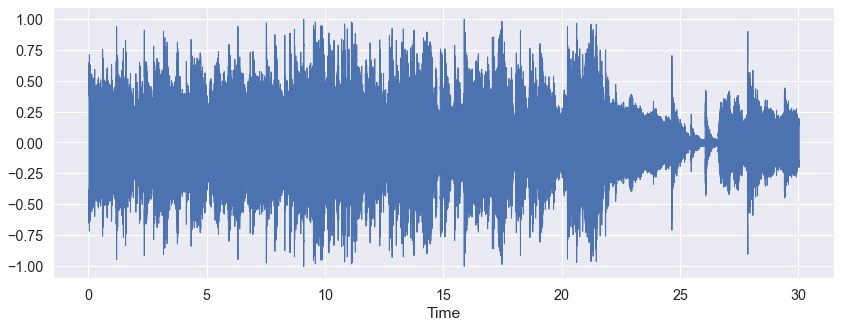

In [5]:
rock_path = 'genres_original/rock/rock.00001.wav'
rock_audio = plot_sound(rock_path)
ipd.Audio(rock_path)

In [6]:
pop_path = 'genres_original/pop/pop.00001.wav'
pop_audio = plot_sound(pop_path)
ipd.Audio(pop_path)

length (661504,), sample-rate 22050


# import dataset 

In [7]:
data = pd.read_csv('features_3_sec.csv')

# know some info about dataset

In [8]:
# shape of dataset
data.shape

(9990, 60)

In [9]:
# show the info of all dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [10]:
#use datasist to know unique and missing  values
ds.structdata.describe(data)

First five data points


filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]



Random five data points


filename  length  chroma_stft_mean  chroma_stft_var  \
1949  classical.00095.1.wav   66149          0.250730         0.087154   
4337     hiphop.00034.5.wav   66149          0.453222         0.083690   
1477  classical.00047.7.wav   66149          0.295641         0.077356   
5620       jazz.00062.8.wav   66149          0.283042         0.081520   
6139      metal.00014.7.wav   66149          0.596155         0.059669   

      rms_mean       rms_var  spectral_centroid_mean  spectral_centroid_var  \
1949  0.010796  8.733034e-06             2150.456111          204167.673774   
4337  0.241365  2.285405e-03             3041.593173          289399.957703   
1477  0.004228  9.793793e-07             1124.828208           23573.730801   
5620  0.097018  1.065157e-03             1834.121061          132870.011438   
6139  0.066917  8.167316e-04             3166.213329           85651.354378   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
1949              1893.321990            32418.729840  ...  108.812874   
4337              2681.401356            73000.104110  ...   50.470634   
1477              1587.246052            25301.243801  ...   38.205017   
5620              2239.246907           133199.898178  ...   52.159821   
6139              2296.444208            15405.357488  ...   57.199280   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
1949     8.363891  125.744904     5.269061   24.748949   -23.676704   
4337    -4.594388   38.722775     3.884700   38.949646    -1.505016   
1477    -0.790971   23.689262     0.330056   35.041420     6.353674   
5620    -3.179508   68.121178    -0.134055   43.453201     5.797467   
6139   -13.640257   33.192841     2.422838   17.708117    -9.144629   

      mfcc19_var  mfcc20_mean  mfcc20_var      label  
1949   32.433228    -3.381155  106.430420  classical  
4337   56.872147    -0.284158   61.670708     hiphop  
1477  103.316505    13.521922   93.701683  classical  
5620   45.992073     2.508442   40.497890       jazz  
6139   25.898258    -3.064779   84.633911      metal  

[5 rows x 60 columns]



Last five data points


filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
9985  rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986  rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987  rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988  rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989  rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     0.675824   12.787750   rock  
9989   39.485901    -3.412534   31.727489   rock  

[5 rows x 60 columns]



Shape of  data set: (9990, 60)


Size of  data set: 599400


Data Types
Note: All Non-numerical features are identified as objects in pandas


Data Type
filename                   object
length                      int64
chroma_stft_mean          float64
chroma_stft_var           float64
rms_mean                  float64
rms_var                   float64
spectral_centroid_mean    float64
spectral_centroid_var     float64
spectral_bandwidth_mean   float64
spectral_bandwidth_var    float64
rolloff_mean              float64
rolloff_var               float64
zero_crossing_rate_mean   float64
zero_crossing_rate_var    float64
harmony_mean              float64
harmony_var               float64
perceptr_mean             float64
perceptr_var              float64
tempo                     float64
mfcc1_mean                float64
mfcc1_var                 float64
mfcc2_mean                float64
mfcc2_var                 float64
mfcc3_mean                float64
mfcc3_var                 float64
mfcc4_mean                float64
mfcc4_var                 float64
mfcc5_mean                float64
mfcc5_var                 float64
mfcc6_mean                float64
mfcc6_var                 float64
mfcc7_mean                float64
mfcc7_var                 float64
mfcc8_mean                float64
mfcc8_var                 float64
mfcc9_mean                float64
mfcc9_var                 float64
mfcc10_mean               float64
mfcc10_var                float64
mfcc11_mean               float64
mfcc11_var                float64
mfcc12_mean               float64
mfcc12_var                float64
mfcc13_mean               float64
mfcc13_var                float64
mfcc14_mean               float64
mfcc14_var                float64
mfcc15_mean               float64
mfcc15_var                float64
mfcc16_mean               float64
mfcc16_var                float64
mfcc17_mean               float64
mfcc17_var                float64
mfcc18_mean               float64
mfcc18_var                float64
mfcc19_mean               float64
mfcc19_var                float64
mfcc20_mean               float64
mfcc20_var                float64
label                      object



Numerical Features in Data set
['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']


Categorical Features in Data set


['filename', 'label']



Statistical Description of Columns


length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]



Description of Categorical Features


count unique                 top  freq
filename  9990   9990  reggae.00055.5.wav     1
label     9990     10               metal  1000



Unique class Count of Categorical features




Missing Values in Data


features  missing_counts  missing_percent
0                  filename               0              0.0
1                    length               0              0.0
2          chroma_stft_mean               0              0.0
3           chroma_stft_var               0              0.0
4                  rms_mean               0              0.0
5                   rms_var               0              0.0
6    spectral_centroid_mean               0              0.0
7     spectral_centroid_var               0              0.0
8   spectral_bandwidth_mean               0              0.0
9    spectral_bandwidth_var               0              0.0
10             rolloff_mean               0              0.0
11              rolloff_var               0              0.0
12  zero_crossing_rate_mean               0              0.0
13   zero_crossing_rate_var               0              0.0
14             harmony_mean               0              0.0
15              harmony_var               0              0.0
16            perceptr_mean               0              0.0
17             perceptr_var               0              0.0
18                    tempo               0              0.0
19               mfcc1_mean               0              0.0
20                mfcc1_var               0              0.0
21               mfcc2_mean               0              0.0
22                mfcc2_var               0              0.0
23               mfcc3_mean               0              0.0
24                mfcc3_var               0              0.0
25               mfcc4_mean               0              0.0
26                mfcc4_var               0              0.0
27               mfcc5_mean               0              0.0
28                mfcc5_var               0              0.0
29               mfcc6_mean               0              0.0
30                mfcc6_var               0              0.0
31               mfcc7_mean               0              0.0
32                mfcc7_var               0              0.0
33               mfcc8_mean               0              0.0
34                mfcc8_var               0              0.0
35               mfcc9_mean               0              0.0
36                mfcc9_var               0              0.0
37              mfcc10_mean               0              0.0
38               mfcc10_var               0              0.0
39              mfcc11_mean               0              0.0
40               mfcc11_var               0              0.0
41              mfcc12_mean               0              0.0
42               mfcc12_var               0              0.0
43              mfcc13_mean               0              0.0
44               mfcc13_var               0              0.0
45              mfcc14_mean               0              0.0
46               mfcc14_var               0              0.0
47              mfcc15_mean               0              0.0
48               mfcc15_var               0              0.0
49              mfcc16_mean               0              0.0
50               mfcc16_var               0              0.0
51              mfcc17_mean               0              0.0
52               mfcc17_var               0              0.0
53              mfcc18_mean               0              0.0
54               mfcc18_var               0              0.0
55              mfcc19_mean               0              0.0
56               mfcc19_var               0              0.0
57              mfcc20_mean               0              0.0
58               mfcc20_var               0              0.0
59                    label               0              0.0

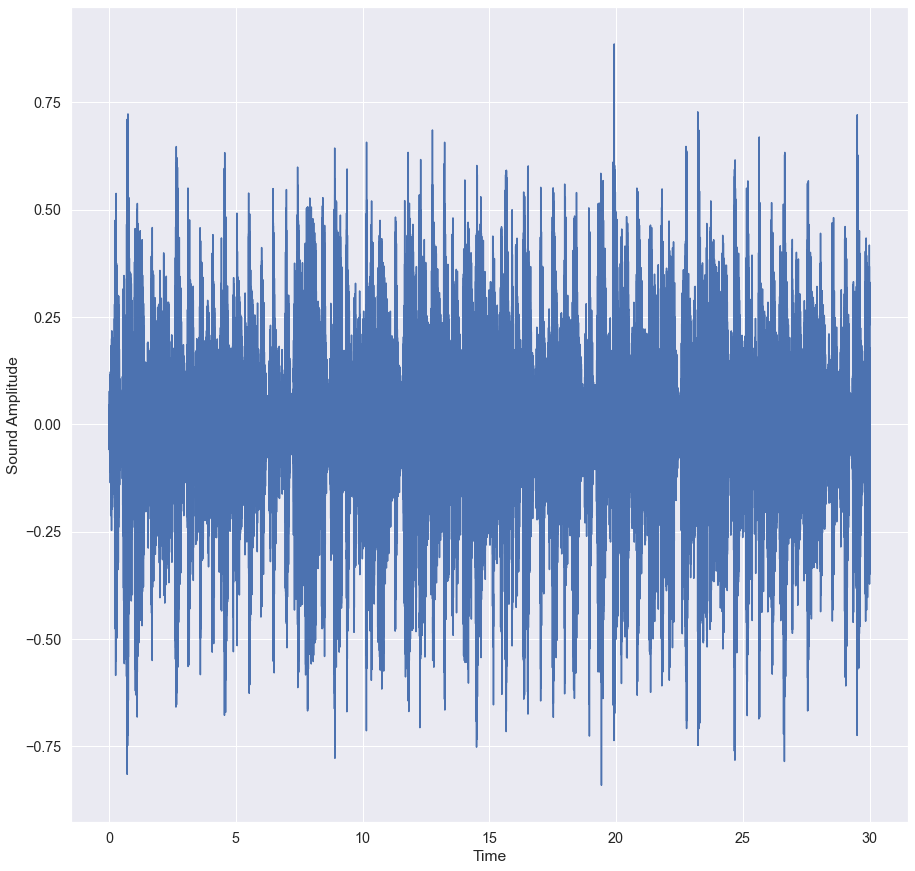

In [11]:
filepath = r'D:\lecturs_epsilon\music genre classification\/Data/genres_original/blues/blues.0000'

for i in range(1):
    audio, sfreq = librosa.load(filepath+str(i)+".wav")
    time = np.arange(0, len(audio))/sfreq
    plt.plot(time,audio)
    plt.xlabel("Time")
    plt.ylabel("Sound Amplitude")
    plt.show()


# use heatmap to know which features correlat with other

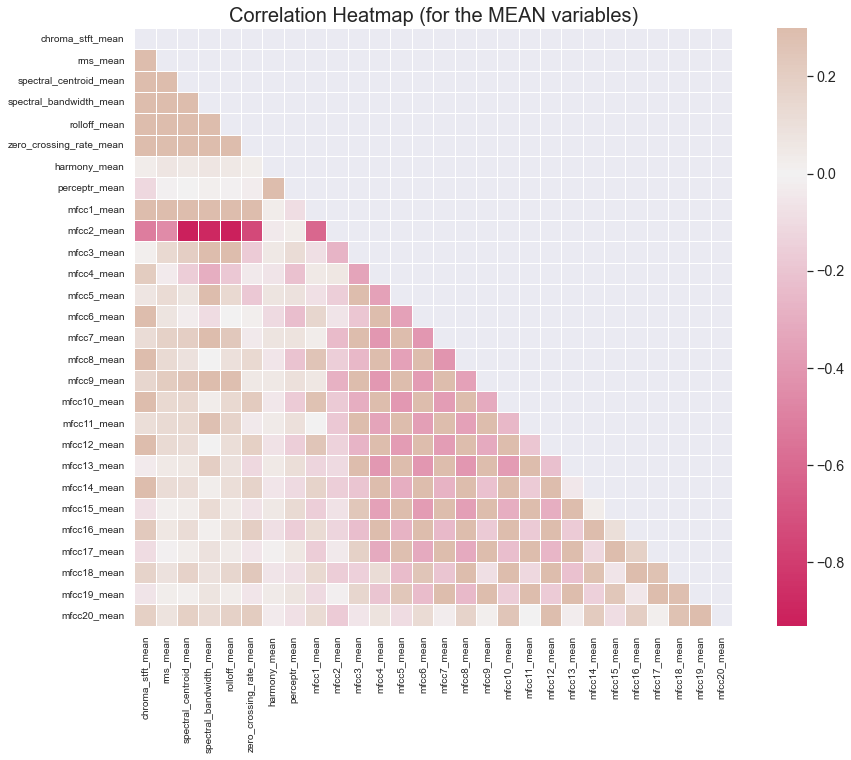

In [54]:
# Computing the Correlation Matrix
mean_cols = [col for col in data.columns if 'mean' in col]
corr = data[mean_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

# Make a box plot to know the outliers of data

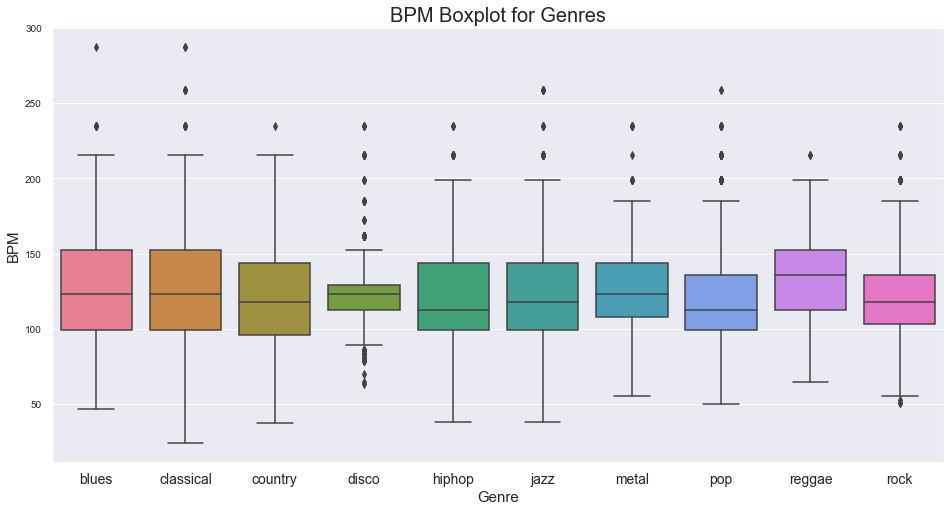

In [13]:
x = data[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

# plot the HZ in the time domain

In [14]:
pop_path = 'genres_original/pop/pop.00001.wav'

x, sr = librosa.load(pop_path)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# use LabelEncoder to conver label from text to number

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [16]:
label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

# split the data

In [17]:
X = data.drop(['label','filename','length'] , axis=1)
y = data['label'] 

# use StandardScaler to redusr the data scaled 

In [18]:
cols = X.columns
Stander_scaler = StandardScaler()
np_scaled = Stander_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols )
X

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            -0.487808         0.640520 -0.006624  0.235568   
1            -0.403142         0.131835 -0.264944 -0.342134   
2            -0.361694         0.764491  0.016695  0.542195   
3            -0.175714         0.205477  0.024885 -0.063820   
4            -0.485895         0.337521  0.181345 -0.272072   
...                ...              ...       ...       ...   
9985         -0.336142        -0.452556 -1.179421 -0.719300   
9986         -0.077048        -0.233533 -1.064490 -0.722003   
9987         -0.354330         0.429974 -1.144644 -0.550873   
9988          0.088361        -0.006301 -0.939996 -0.657073   
9989         -0.113210         0.195363 -1.172055 -0.727820   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                  -0.566828              -0.572791                -0.493983   
1                  -0.508798              -0.749862                -0.425382   
2                  -0.546245              -0.701852                -0.288365   
3                  -0.723482              -0.700599                -0.517344   
4                  -0.756246              -0.774827                -0.538557   
...                      ...                    ...                      ...   
9985               -0.931252              -0.580320                -0.961112   
9986               -0.467203              -0.311806                -0.615853   
9987               -1.134658               0.566244                -1.249527   
9988               -0.152568              -0.489218                -0.410093   
9989               -0.751359              -0.012056                -0.687651   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                  -0.009229     -0.518590    -0.367952  ...    -0.750122   
1                  -0.519010     -0.424118    -0.642268  ...     0.457983   
2                  -0.425734     -0.346190    -0.562723  ...     0.585548   
3                  -0.348881     -0.607665    -0.474804  ...    -0.489524   
4                  -0.572962     -0.667537    -0.683920  ...     0.112417   
...                      ...           ...          ...  ...          ...   
9985               -0.319102     -0.944295    -0.524290  ...     0.754254   
9986               -0.182979     -0.499020    -0.307455  ...     0.109142   
9987                0.202197     -1.293384     0.654042  ...    -0.427859   
9988               -0.941435     -0.153966    -0.760011  ...     0.466474   
9989                0.014318     -0.672379    -0.075050  ...    -0.018478   

      mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0      -0.299108     0.168647   -0.425137    -0.003423   -0.376938   
1       0.428544    -0.327031   -0.310040    -0.112125   -0.032083   
2       0.503695     0.428053   -0.648762     0.316311   -0.177372   
3      -0.065309     0.062981   -0.649076     0.092384   -0.464121   
4      -0.570609     0.856651   -0.167089     0.183265   -0.029476   
...          ...          ...         ...          ...         ...   
9985   -0.217844    -0.862336   -0.374625    -0.962530   -0.561595   
9986   -0.510250    -1.440353    0.397151    -0.737537    0.050436   
9987    0.819933     0.294908   -0.829250     0.785553   -0.694378   
9988   -0.629045    -0.205181   -0.954778     1.104536   -0.813248   
9989   -0.324816    -1.303430    0.192873    -0.177273    0.085722   

      mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
0       -0.499464   -0.513562     0.128414   -0.291781  
1       -0.066593    1.011384     1.275780    0.056425  
2        0.109337   -0.046244     0.653907   -0.521458  
3       -0.211882   -0.099501     0.865880   -0.544744  
4       -0.175130   -0.678995     0.276899   -0.606692  
...           ...         ...          ...         ...  
9985    -0.612047   -0.148369     0.520925   -0.395239  
9986    -1.851347    0.203889     0.256319   -0.831697  
9987     

# split the data to train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=111 ,shuffle =True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7992, 57), (1998, 57), (7992,), (1998,))

# import libraries for machine learning 

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import catboost as cb


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [21]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [22]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# catboost
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
model_assess(cbc,"Cat Boost Classifier")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.51151 

Accuracy Stochastic Gradient Descent : 0.67718 

Accuracy KNN : 0.81281 

Accuracy Decission trees : 0.63263 

Accuracy Random Forest : 0.8023 

Accuracy Support Vector Machine : 0.85936 

Accuracy Logistic Regression : 0.72122 

Accuracy Neural Nets : 0.88939 

Accuracy Cat Boost Classifier : 0.91291 

Accuracy Cross Gradient Booster : 0.91742 

Accuracy Cross Gradient Booster (Random Forest) : 0.73674 



In [23]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9174174174174174

# to make Cross-validation of model

In [25]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score , KFold
from sklearn.metrics import accuracy_score

In [26]:
# cv_results_dtc = cross_validate(model, X, y, cv=20, return_train_score=True, n_jobs=-1)
# cv_results_dtc

In [27]:
# cv_results_dtc['train_score'].mean()

In [28]:
# cv_results_dtc['test_score'].mean()

In [29]:
# confusion_matrix(y_test, y_pred)

# to convert wav to features on inter to machine learning model 

In [30]:
def preprocess(file):
    y, sr = librosa.load(file, duration=30)

    #data0 = []
    #defining the Chroma features in the dataframe
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = chroma.mean()#chroma_stft_mean
    chroma_stft_var = chroma.var()#chroma_stft_var
    #chroma_stft_std = chroma.std()#chroma_stft_std

    #defining the rms features in the dataframe
    rms = librosa.feature.rms(y=y)
    rms_mean = rms.mean()#rms_mean
    rms_var = rms.var()#rms_var
    #rms_std = rms.std()#rms_std

    #defining the spectral centroid features in the dataframe
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = cent.mean()#spec_cent_mean
    spectral_centroid_var = cent.var()#spec_cent_var
    #spec_cent_std = cent.std()#spec_cent_std
      
     #defining the spectral bandwidth features in the dataframe
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = spec_bw.mean()#spec_ban_mean
    spectral_bandwidth_var = spec_bw.var()#spec_ban_var
    #spec_ban_std = spec_bw.std()#spec_ban_std
  
    #defining the spectral roll-off features in the dataframe
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = rolloff.mean()#spec_roll_mean
    rolloff_var = rolloff.var()#spec_roll_var
        
    zero_crossing_rate=librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = zero_crossing_rate.mean()#zero_crossing_rate_mean
    zero_crossing_rate_var = zero_crossing_rate.var()#zero_crossing_rate_var

    harmonic=librosa.effects.harmonic(y)
    harmony_mean = harmonic.mean()#harmony_mean
    harmony_var = harmonic.var()#harmony_var

    C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('A1')))
    freqs = librosa.cqt_frequencies(C.shape[0] , fmin=librosa.note_to_hz('A1'))
    perceptr = librosa.perceptual_weighting(C**2, freqs, ref=np.max)
    perceptr_mean = perceptr.mean()#perceptr_mean
    perceptr_var = perceptr.var()#perceptr_var
 
    #defining the mel frequency cepstrum coefficient features in the dataframe
    mfcc1 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=1)#n_mfcc=1
    mfcc1_mean = mfcc1.mean()#mfcc1_mean
    mfcc1_var = mfcc1.var()#mfcc1_var
 
    mfcc2 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=2)#n_mfcc=2
    mfcc2_mean = mfcc2.mean()#mfcc2_mean
    mfcc2_var = mfcc2.var()#mfcc2_var

    mfcc3 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=3)#n_mfcc=3
    mfcc3_mean = mfcc3.mean()#mfcc3_mean
    mfcc3_var = mfcc3.var()#mfcc3_var

    mfcc4 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=4)#n_mfcc=4
    mfcc4_mean = mfcc4.mean()#mfcc4_mean
    mfcc4_var = mfcc4.var()#mfcc4_var

    mfcc5 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)#n_mfcc=5
    mfcc5_mean = mfcc5.mean()#mfcc5_mean
    mfcc5_var = mfcc5.var()#mfcc5_var

    mfcc6 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=6)#n_mfcc=6
    mfcc6_mean = mfcc6.mean()#mfcc6_mean
    mfcc6_var = mfcc6.var()#mfcc6_var

    mfcc7 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=7)#n_mfcc=7
    mfcc7_mean = mfcc7.mean()#mfcc7_mean
    mfcc7_var = mfcc7.var()#mfcc7_var

    mfcc8 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)#n_mfcc=8
    mfcc8_mean = mfcc8.mean()#mfcc8_mean
    mfcc8_var = mfcc8.var()#mfcc8_var

    mfcc9 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=9)#n_mfcc=9
    mfcc9_mean = mfcc9.mean()#mfcc9_mean
    mfcc9_var = mfcc9.var()#mfcc9_var

    mfcc10 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)#n_mfcc=10
    mfcc10_mean = mfcc10.mean()#mfcc10_mean
    mfcc10_var = mfcc10.var()#mfcc10_var
    
    mfcc11 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=11)#n_mfcc=11
    mfcc11_mean = mfcc11.mean()#mfcc11_mean
    mfcc11_var = mfcc11.var()#mfcc11_var
    
    mfcc12 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)#n_mfcc=12
    mfcc12_mean = mfcc12.mean()#mfcc11_mean
    mfcc12_var = mfcc12.var()#mfcc11_var
    
    mfcc13 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)#n_mfcc=13
    mfcc13_mean = mfcc13.mean()#mfcc10_mean
    mfcc13_var = mfcc13.var()#mfcc10_var
    
    mfcc14 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=14)#n_mfcc=14
    mfcc14_mean = mfcc14.mean()#mfcc14_mean
    mfcc14_var = mfcc14.var()#mfcc14_var
    
    mfcc15 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=15)#n_mfcc=15
    mfcc15_mean = mfcc15.mean()#mfcc15_mean
    mfcc15_var = mfcc15.var()#mfcc15_var

    mfcc16 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=16)#n_mfcc=16
    mfcc16_mean = mfcc16.mean()#mfcc16_mean
    mfcc16_var = mfcc16.var()#mfcc16_var
    
    mfcc17 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=17)#n_mfcc=17
    mfcc17_mean = mfcc17.mean()#mfcc17_mean
    mfcc17_var = mfcc17.var()#mfcc17_var
    
    mfcc18 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=18)#n_mfcc=18
    mfcc18_mean = mfcc18.mean()#mfcc18_mean
    mfcc18_var = mfcc18.var()#mfcc18_var
    
    mfcc19 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=19)#n_mfcc=19
    mfcc19_mean = mfcc19.mean()#mfcc19_mean
    mfcc19_var = mfcc19.var()#mfcc19_var
    
    mfcc20 = librosa.feature.mfcc(y=y, sr=sr)#n_mfcc=20
    mfcc20_mean = mfcc20.mean()#mfcc20_mean
    mfcc20_var = mfcc20.var()#mfcc20_var

    #defining the zero crossing rate features in the dataframe
    zero_crosing_rate = librosa.feature.zero_crossing_rate(y)
    zero_cros_mean = zero_crosing_rate.mean()#zero_cros_mean
    zero_cros_var = zero_crosing_rate.var()#zero_cros_var

    #defining the Tempo feature in the dataframe
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
    Tempo = tempo.mean()#Tempo

    data0 = [[chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var,  
                 spectral_bandwidth_mean, spectral_bandwidth_var , rolloff_mean, rolloff_var,  
                 zero_crossing_rate_mean, zero_crossing_rate_var,harmony_mean , harmony_var, perceptr_mean,perceptr_var,tempo, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, 
                 mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var, mfcc6_mean, mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var, 
                 mfcc9_mean, mfcc9_var, mfcc10_mean, mfcc10_var,mfcc11_mean, mfcc11_var, mfcc12_mean, mfcc12_var,
                 mfcc13_mean, mfcc13_var, mfcc14_mean, mfcc14_var, mfcc15_mean, mfcc15_var, mfcc16_mean, mfcc16_var, mfcc17_mean, mfcc17_var,
                 mfcc18_mean, mfcc18_var, mfcc19_mean, mfcc19_var, mfcc20_mean, mfcc20_var]]
    #
    return np.array(data0)

In [31]:
data_new = preprocess("genres_original/pop/pop.00031.wav")
data_new

array([[0.36603385, 0.0852158, 0.19834772, 0.0060577, 3111.0610987934515,
        607930.5083758857, 2992.192111938664, 120346.40787832829,
        6745.27587890625, 2184922.2391239447, 0.15291026206946595,
        0.004725810513618066, 1.7672126e-05, 0.020901099,
        -42.04259716267998, 167.22272718171754, array([95.703125]),
        -18.854591, 3377.1494, 26.236965, 3969.7573, 16.243567, 2940.93,
        11.833527, 2325.8713, 9.6088915, 1905.2839, 7.8325524, 1627.2544,
        6.5632734, 1416.8138, 5.7116804, 1256.7905, 5.1463785, 1132.9889,
        4.6746707, 1029.7184, 4.114311, 946.9571, 3.6815283, 876.0507,
        3.584136, 812.402, 3.4172156, 757.8385, 3.2541885, 710.9796,
        2.8265374, 672.6635, 2.7127264, 636.1355, 2.5344484, 603.63556,
        2.4383385, 574.0939, 2.4000475, 547.8355]], dtype=object)

In [32]:
data_new = preprocess("genres_original/pop/pop.00031.wav")
len(data_new[0])

57

In [33]:
data_scaled = Stander_scaler.transform(data_new)

In [34]:
model.predict(data_scaled)

array([7])

# Deep learning model

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau , ModelCheckpoint 

In [36]:
def trainModel(model,epochs,optimizer):
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=256,shuffle=True)

In [37]:
# use relu activation function
model=tf.keras.models.Sequential([
   tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
   tf.keras.layers.Dropout(0.2),
   
   tf.keras.layers.Dense(256,activation='relu'),
   tf.keras.layers.Dropout(0.2),
    
   tf.keras.layers.Dense(128,activation='relu'),
   tf.keras.layers.Dropout(0.2),
    
   tf.keras.layers.Dense(64,activation='relu'),
   tf.keras.layers.Dropout(0.2),
    
   tf.keras.layers.Dense(10,activation='softmax'), # use softmax activation function
])

print(model.summary())
model_histry=trainModel(model=model,epochs=100,optimizer='adam') # make 100 apochs and adam optimizer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

32/32 [==============================] - 0s 7ms/step - loss: 0.0711 - accuracy: 0.9759 - val_loss: 0.3166 - val_accuracy: 0.9209
Epoch 48/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0702 - accuracy: 0.9780 - val_loss: 0.3231 - val_accuracy: 0.9179
Epoch 49/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0763 - accuracy: 0.9752 - val_loss: 0.3229 - val_accuracy: 0.9139
Epoch 50/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 0.9819 - val_loss: 0.3287 - val_accuracy: 0.9159
Epoch 51/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.3079 - val_accuracy: 0.9169
Epoch 52/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0633 - accuracy: 0.9790 - val_loss: 0.3055 - val_accuracy: 0.9199
Epoch 53/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.3049 - val_accuracy: 0.9259
Epoch 54/100
32/32 

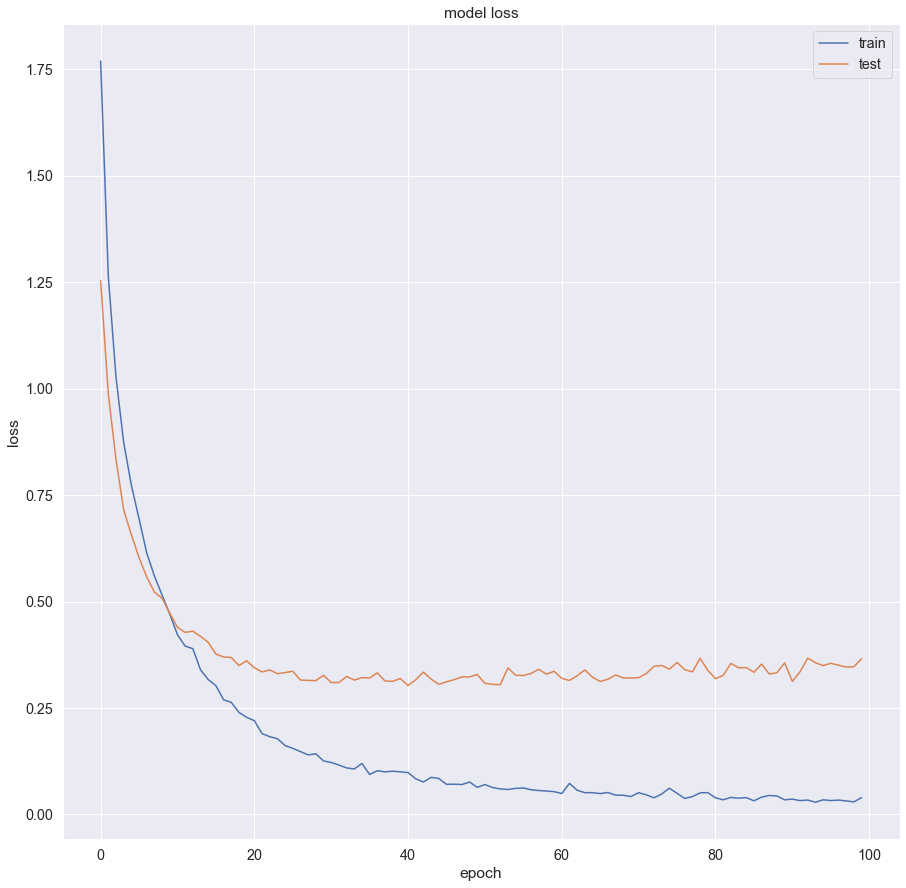

In [38]:
# summarize history for loss
plt.plot(model_histry.history['loss'])
plt.plot(model_histry.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

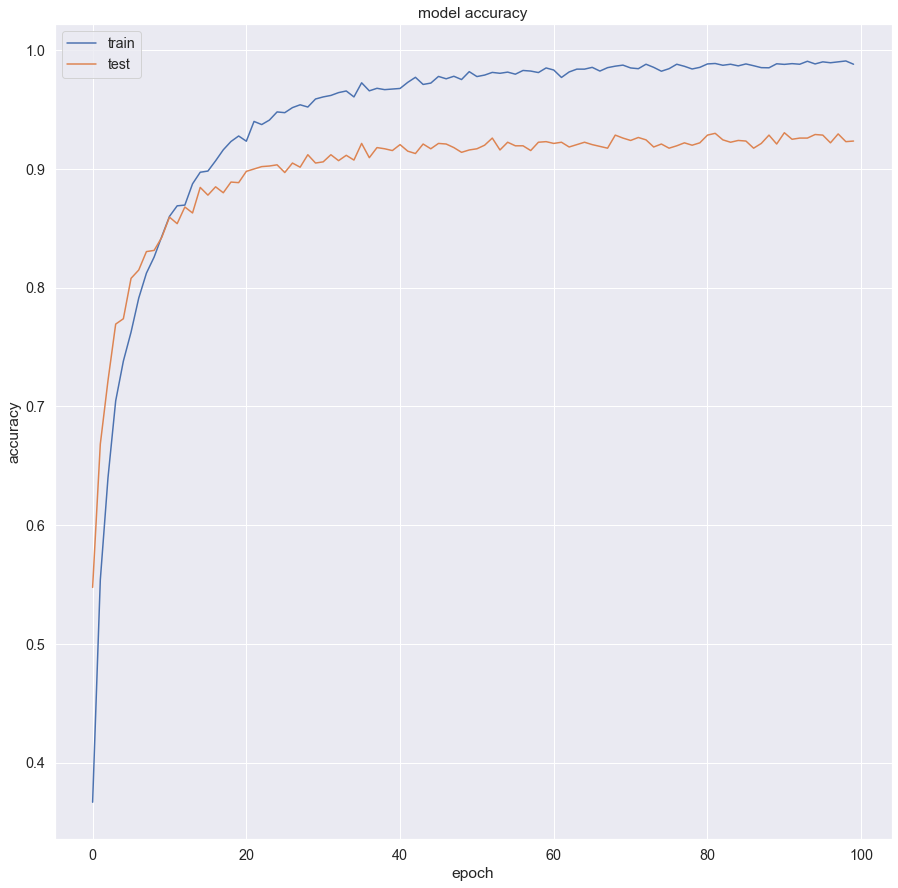

In [39]:

# summarize history for accuracy
plt.plot(model_histry.history['accuracy'])
plt.plot(model_histry.history[
    'val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# train the dataset use deep learning model

In [40]:
data_new1 = preprocess("genres_original/hiphop/hiphop.00001.wav")

In [41]:
data_scaled = Stander_scaler.transform(data_new1)


In [42]:
model.predict(data_scaled).argmax()

4

In [43]:
data_new3 = preprocess("genres_original/country/country.00001.wav")

In [44]:
data_scaled = Stander_scaler.fit_transform(data_new3)


In [45]:
model.predict(data_scaled).argmax()

8

In [46]:
model.predict(data_scaled)

array([[0.00380615, 0.00062547, 0.30236477, 0.15933846, 0.01310057,
        0.00450867, 0.00093247, 0.00482826, 0.48062426, 0.02987085]],
      dtype=float32)

# show the accuracy of model and loss 

In [47]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.9234
The test loss is  0.36548084020614624
The best accuracy is:  92.34234094619751


# save the deep learning model

In [48]:
model.save('model.h5')

In [49]:
import joblib

In [50]:
import joblib

joblib.dump(Stander_scaler, 'scaler.h5')

['scaler.h5']